<a href="https://colab.research.google.com/github/SonakshiA/Amazon-Kindle-Reviews-Sentiment-Analysis/blob/main/Kindle_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

In [ ]:
dataset = od.download('https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis/data')

Skipping, found downloaded files in "./amazon-kindle-book-review-for-sentiment-analysis" (use force=True to force download)


In [ ]:
kindle_reviews = pd.read_csv('amazon-kindle-book-review-for-sentiment-analysis/preprocessed_kindle_review .csv')
kindle_reviews.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
kindle_reviews.shape

(12000, 4)

In [ ]:
kindle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12000 non-null  int64 
 1   rating      12000 non-null  int64 
 2   reviewText  12000 non-null  object
 3   summary     12000 non-null  object
dtypes: int64(2), object(2)
memory usage: 375.1+ KB


**Dropping Duplicates and Null Values (if any)**

In [ ]:
duplicated_count = kindle_reviews.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  0


In [ ]:
null_values = kindle_reviews.isna().sum()
print("Number of entries with null values: ",null_values)

Number of entries with null values:  Unnamed: 0    0
rating        0
reviewText    0
summary       0
dtype: int64


In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
kindle_reviews['word_count'] = kindle_reviews['reviewText'].apply(no_of_words)

In [ ]:
kindle_reviews.head()

,Unnamed: 0,rating,reviewText,summary,word_count
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,61
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,385
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,444
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,66
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,71


**Number of reviews for each rating from 0 to 5**

In [ ]:
print("Number of reviews with rating 0: ",kindle_reviews[kindle_reviews['rating']==0]['reviewText'].count())
print("Number of reviews with rating 1: ",kindle_reviews[kindle_reviews['rating']==1]['reviewText'].count())
print("Number of reviews with rating 2: ",kindle_reviews[kindle_reviews['rating']==2]['reviewText'].count())
print("Number of reviews with rating 3: ",kindle_reviews[kindle_reviews['rating']==3]['reviewText'].count())
print("Number of reviews with rating 4: ",kindle_reviews[kindle_reviews['rating']==4]['reviewText'].count())
print("Number of reviews with rating 5: ",kindle_reviews[kindle_reviews['rating']==5]['reviewText'].count())

Number of reviews with rating 0:  0
Number of reviews with rating 1:  2000
Number of reviews with rating 2:  2000
Number of reviews with rating 3:  2000
Number of reviews with rating 4:  3000
Number of reviews with rating 5:  3000


**SENTIMENT ANALYSIS**

**Alloting sentiments based on review/score**


*   0 for review/score 0,1,2 (negative review)
*   1 for review/score 3 (neutral)
*   2 for review/score 4,5 (positive)


In [ ]:
conditions = [(kindle_reviews['rating']<3),(kindle_reviews['rating']==3),(kindle_reviews['rating']>3)]
choice = [0,1,2]
kindle_reviews['sentiment'] = np.select(conditions,choice)

In [ ]:
kindle_reviews.head(10)

,Unnamed: 0,rating,reviewText,summary,word_count,sentiment
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,61,2
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,385,0
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,444,2
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,66,2
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,71,2
5,5,4,I really enjoyed how this story developed. It...,When an Alien Scientist Gets Lost in the Orego...,509,2
6,6,3,I bought this book because I loved the cover a...,Hot Civil War Read... I wanted more Romance,111,1
7,7,5,This was a book that I thoroughly enjoyed from...,Wow and wonderful read with a twist,70,2
8,8,4,If the first entry into the series was a toddl...,Steadily getting better!,324,2
9,9,1,I bought this set and returned it. I couldn't...,Childish writing,87,0


**Pie Chart for Sentiment Distribution**

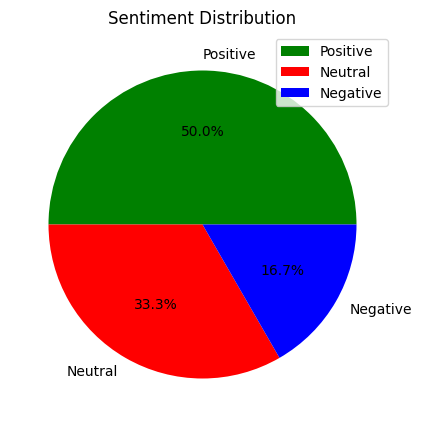

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sizes = kindle_reviews['sentiment'].value_counts()
labels = ['Positive', 'Neutral', 'Negative']
colors=['green','red','blue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors)
plt.title('Sentiment Distribution')
plt.legend()
plt.show()

In [ ]:
for i in range(10):
  print("Review: ",[i])
  print(kindle_reviews['reviewText'].iloc[i],"\n")
  print("Sentiment: ", kindle_reviews['sentiment'].iloc[i],"\n\n")

Review:  [0]
This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories. 

Sentiment:  2 


Review:  [1]
When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into 

**Text Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub(r'http\S+','', text)
  text = re.sub(r'@\w+|#','', text) #removing hashtags and @ symbol
  text = re.sub(r'[^\w\s]','',text) #removing punctuations
  #removing the stop words
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
kindle_reviews['reviewText'] = kindle_reviews['reviewText'].apply(data_processing)

**Stemming**

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
kindle_reviews['reviewText'] = kindle_reviews['reviewText'].apply(stemming)

**Visualizing Positive Reviews and Creating a WordCloud**

In [ ]:
pos_reviews = kindle_reviews[kindle_reviews.sentiment==2]
pos_reviews.head()

,Unnamed: 0,rating,reviewText,summary,word_count,sentiment
0,0,5,book first bookmobile book bought school book ...,50 + years ago...,61,2
2,2,5,edit review book believe got right updated rew...,Wiggleliscious/new toy ready/!!,444,2
3,3,5,dont normally buy mystery novels dont like how...,Very good read.,66,2
4,4,5,isnt kind book normally read although try limi...,Great Story!,71,2
5,5,4,really enjoyed story developed wellwritten sci...,When an Alien Scientist Gets Lost in the Orego...,509,2


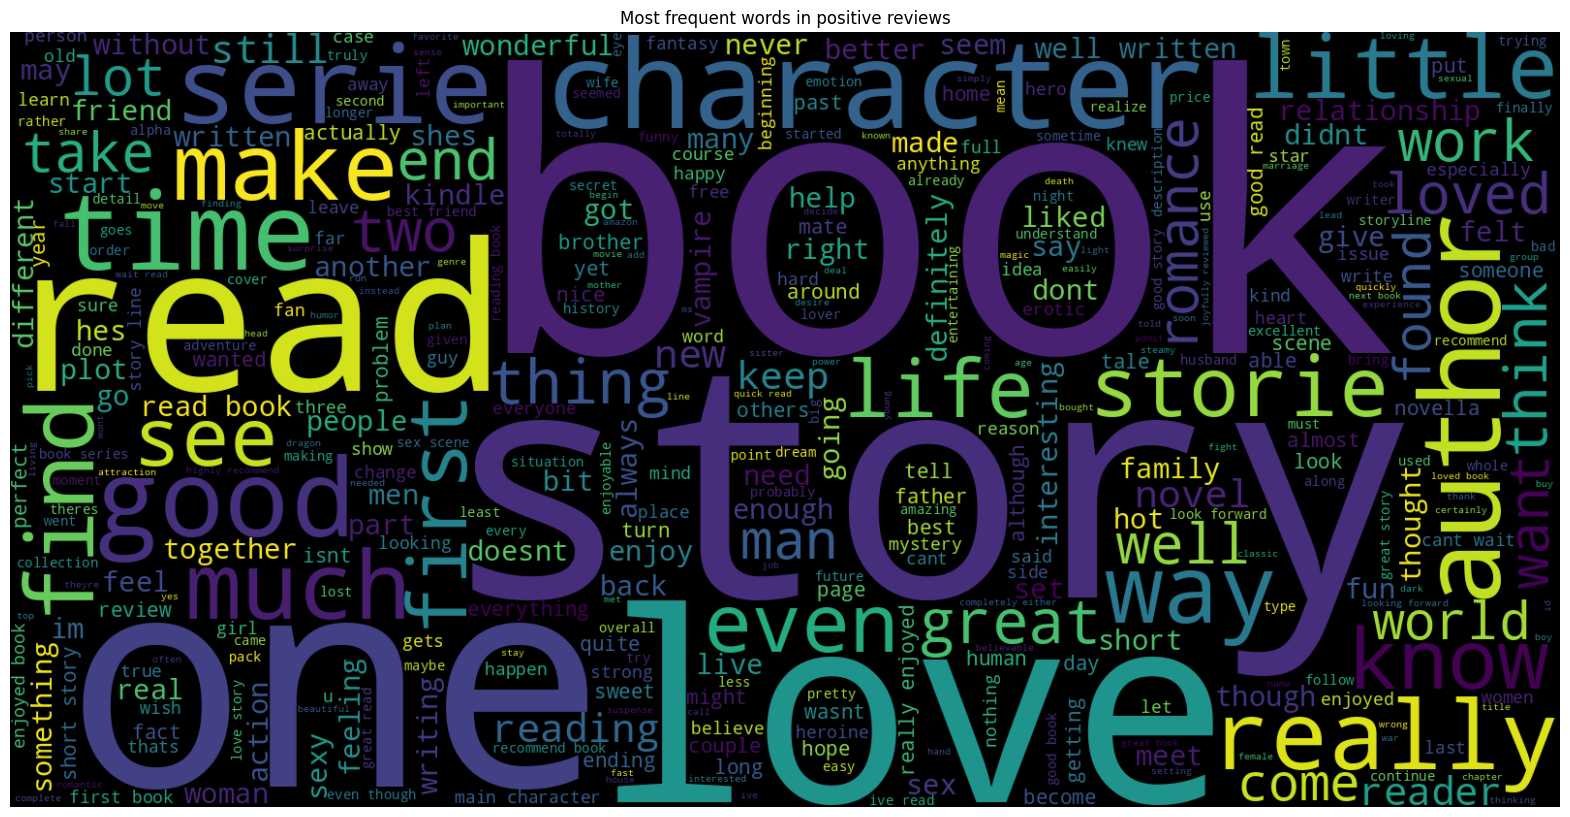

In [ ]:
text = ' '.join([word for word in pos_reviews['reviewText']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=400,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['reviewText']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('book', 5360),
 ('story', 4456),
 ('read', 4331),
 ('one', 2885),
 ('love', 2280),
 ('good', 2215),
 ('characters', 2014),
 ('like', 1998),
 ('series', 1774),
 ('books', 1729),
 ('really', 1671),
 ('would', 1652),
 ('great', 1556),
 ('well', 1523),
 ('reading', 1396)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
pos_words.columns = ['Word','Count']
pos_words.head()

,Word,Count
0,book,5360
1,story,4456
2,read,4331
3,one,2885
4,love,2280


In [ ]:
import plotly.express as px
px.bar(pos_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Negative Reviews and Creating a WordCloud**

In [ ]:
neg_reviews = kindle_reviews[kindle_reviews.sentiment==0]
neg_reviews.head()

,Unnamed: 0,rating,reviewText,summary,word_count,sentiment
1,1,1,read description book couldnt wait read downlo...,Boring! Boring! Boring!,385,0
9,9,1,bought set returned couldnt force finish first...,Childish writing,87,0
11,11,1,thing got end story sheer cussedness storyline...,I'm being kind with 1 star,106,0
14,14,2,good ghost story romance poorly written harleq...,Lousy Read,120,0
21,21,2,read books love read new characters adventures...,Sammi Ever After,420,0


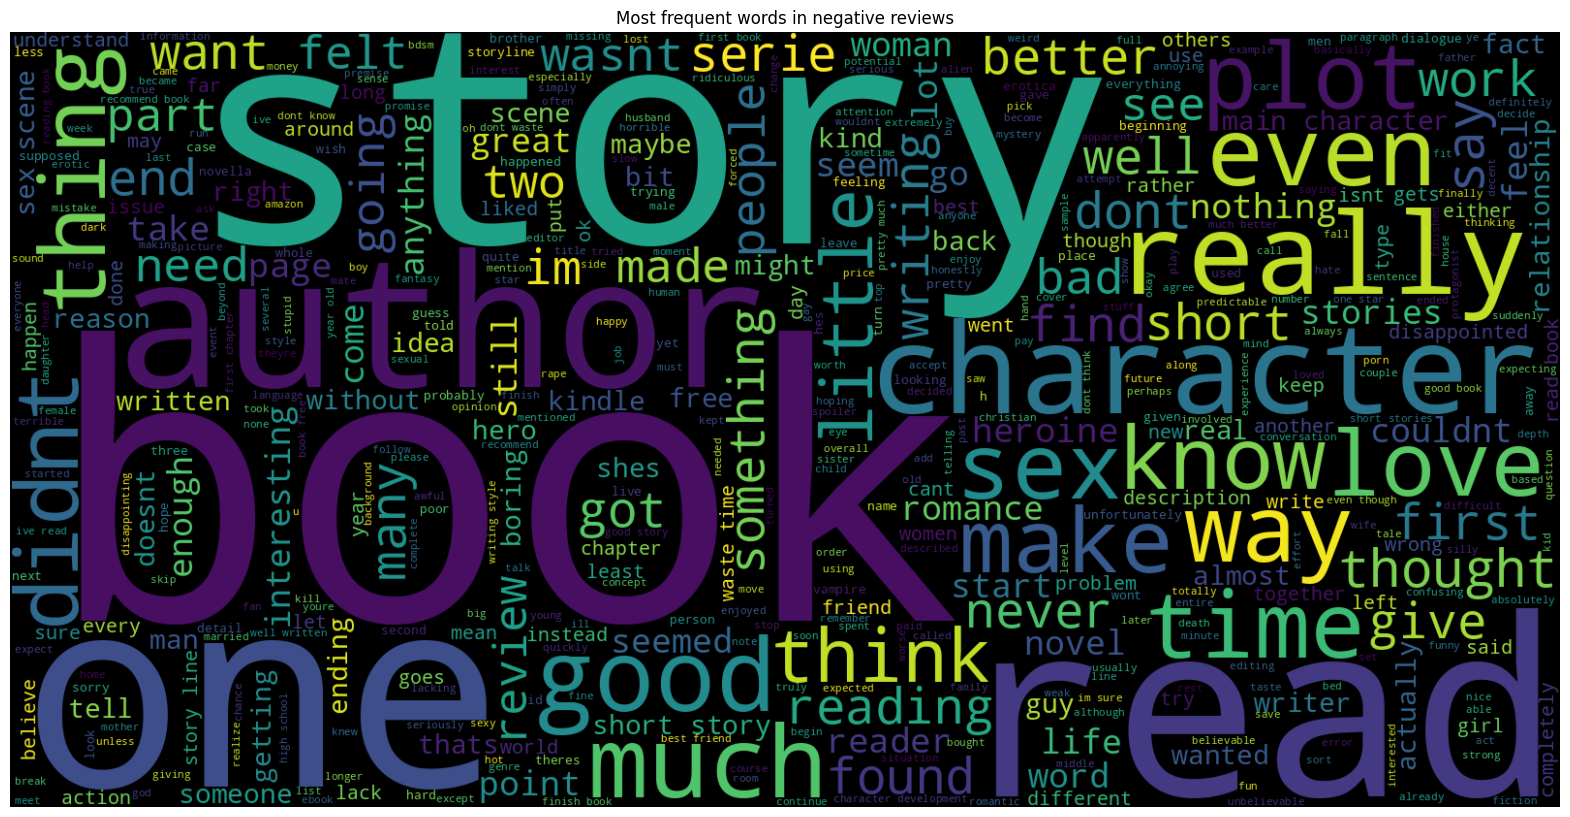

In [ ]:
text = ' '.join([word for word in neg_reviews['reviewText']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neg_reviews['reviewText']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('book', 4697),
 ('story', 3120),
 ('read', 2098),
 ('like', 2014),
 ('one', 1891),
 ('would', 1613),
 ('really', 1412),
 ('characters', 1250),
 ('get', 1171),
 ('didnt', 1165),
 ('good', 1157),
 ('author', 1151),
 ('even', 1064),
 ('time', 1044),
 ('much', 1006)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neg_words.columns = ['Word','Count']
neg_words.head()

,Word,Count
0,book,4697
1,story,3120
2,read,2098
3,like,2014
4,one,1891


In [ ]:
px.bar(neg_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Neutral Reviews**

In [ ]:
neutral_reviews = kindle_reviews[kindle_reviews.sentiment==1]
neutral_reviews.head()

,Unnamed: 0,rating,reviewText,summary,word_count,sentiment
6,6,3,bought book loved cover try read civil war rom...,Hot Civil War Read... I wanted more Romance,111,1
15,15,3,ok quick read main people stood add characters...,unimaginative,37,1
17,17,3,really thought book going better reviews maybe...,An okay read,39,1
18,18,3,one ms lennox earlier writings could really te...,The Greeks baby bargain.,40,1
27,27,3,aside clicheacuted marathon sex book left pret...,Hot and Confused?,110,1


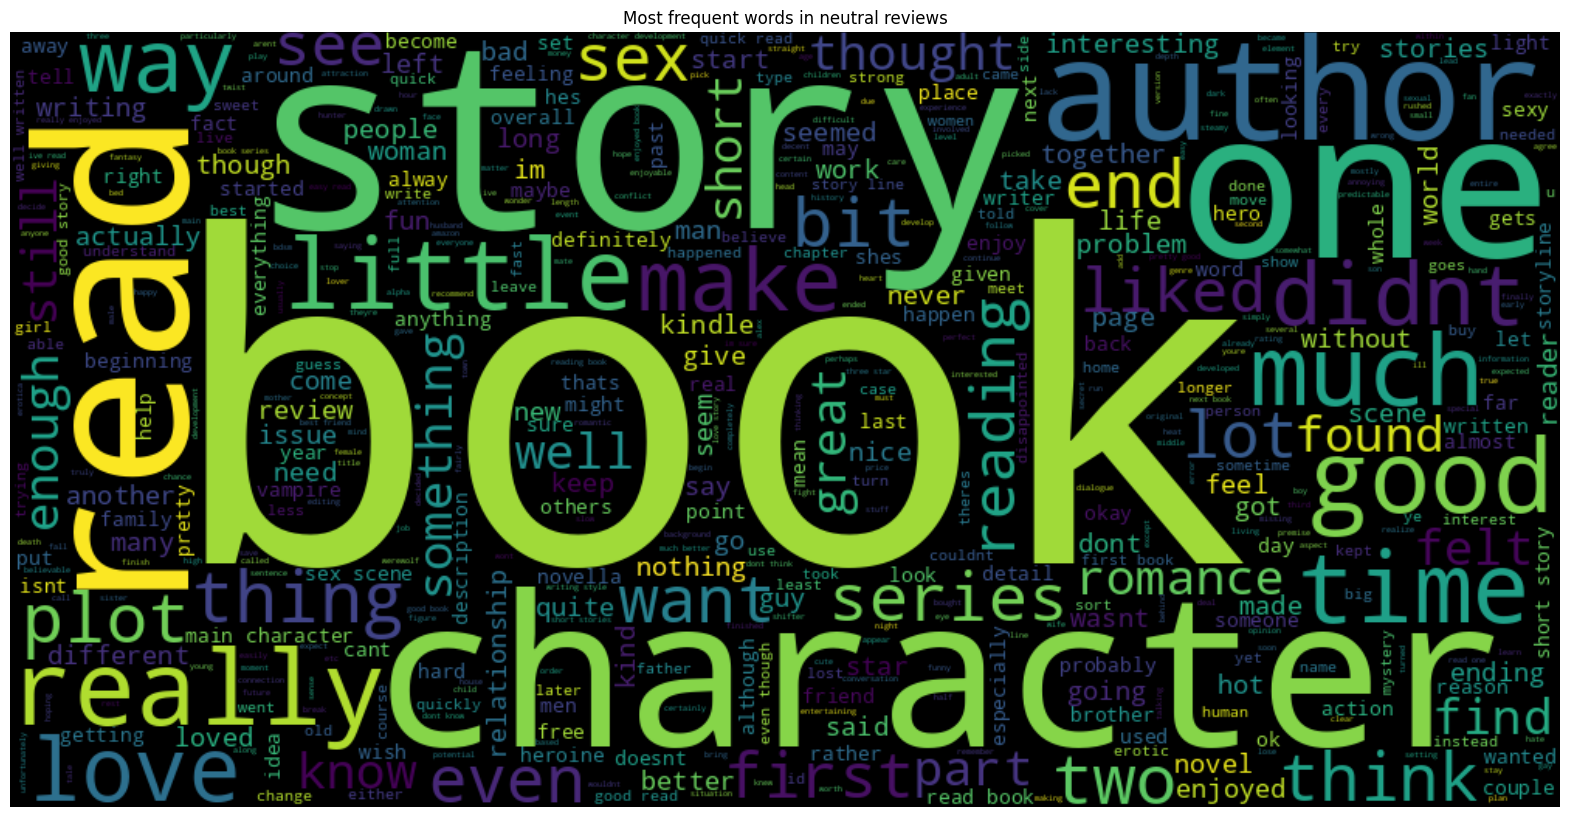

In [ ]:
text = ' '.join([word for word in neutral_reviews['reviewText']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1000,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neutral_reviews['reviewText']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('book', 2247),
 ('story', 1893),
 ('read', 1384),
 ('like', 1006),
 ('one', 953),
 ('good', 903),
 ('would', 828),
 ('characters', 821),
 ('really', 759),
 ('much', 564),
 ('author', 539),
 ('little', 531),
 ('get', 529),
 ('didnt', 520),
 ('love', 500)]

In [ ]:
neutral_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neutral_words.columns = ['Word','Count']
neutral_words.head()

,Word,Count
0,book,2247
1,story,1893
2,read,1384
3,like,1006
4,one,953


In [ ]:
px.bar(neutral_words,x='Count',y='Word',title='Common words in neutral reviews',color='Word')

**Factoring the Data**

In [ ]:
reviews_df = kindle_reviews[['reviewText', 'sentiment']]
reviews_df.head()

,reviewText,sentiment
0,book first bookmobile book bought school book ...,2
1,read description book couldnt wait read downlo...,0
2,edit review book believe got right updated rew...,2
3,dont normally buy mystery novels dont like how...,2
4,isnt kind book normally read although try limi...,2


In [ ]:
x = reviews_df.drop(['sentiment'], axis=1)
y = reviews_df['sentiment']

In [ ]:
print(x.shape)
print(y.shape)

(12000, 1)
(12000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer() #Read more about TF-IDF
x = vect.fit_transform(kindle_reviews['reviewText'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =0)

In [ ]:
print("Size of x_train: ",x_train.shape)
print("Size of x_test: ",x_test.shape)
print("Size of y_train: ",y_train.shape)
print("Size of y_test: ",y_test.shape)

Size of x_train:  (8400, 46636)
Size of x_test:  (3600, 46636)
Size of y_train:  (8400,)
Size of y_test:  (3600,)


**Creating ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print(logreg_acc*100)

74.8888888888889


In [ ]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print(svc_acc*100)

74.30555555555556


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_acc = accuracy_score(nb_pred,y_test)
print(nb_acc*100)

63.11111111111111


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc*100)

55.91666666666667


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=decision_tree)
bagging_classifier.fit(x_train, y_train)
bagg_pred = bagging_classifier.predict(x_test)
bagg_acc = accuracy_score(bagg_pred, y_test)
print(bagg_acc*100)

65.63888888888889


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = SVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  75.16666666666667


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC(probability = True)

voting_model = VotingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], voting = 'soft')
voting_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  73.72222222222223


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  73.72222222222223


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svm_model = SVC()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('svm',svm_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  73.72222222222223


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = LinearSVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  74.94444444444444
